In [8]:
# imports
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

from keys import eia_api_key

In [45]:
api_url = "https://api.eia.gov/v2/electricity/retail-sales/data"

In [63]:
url = api_url + "?api_key=" + eia_api_key() + "&data[0]=sales"

response = requests.get(url)

json_object = response.json()

In [64]:
# convert the json to a data frame with pandas using the information stored in 'data'
df = pd.DataFrame(
        [
            [
                x["period"],
                x["stateid"],
                x["stateDescription"],
                x["sectorid"],
                x["sectorName"],
                x["sales"],
                x["sales-units"],
            ]
            for x in json_object["response"]["data"]
        ],
        columns=["period", "stateid", "stateDescription", "sectorid", "sectorname", "sales", "sales-units"],
    )

# turn the response into a dataframe
# print(response.json())

In [65]:
df.sample(5)

,period,stateid,stateDescription,sectorid,sectorname,sales,sales-units
3139,2012-06,ME,Maine,OTH,other,NaN,million kilowatthours
4150,2005-04,IL,Illinois,IND,industrial,3701.46351,million kilowatthours
1203,2018-01,ID,Idaho,ALL,all sectors,1972.94639,million kilowatthours
248,2015-01,IN,Indiana,RES,residential,3645.43934,million kilowatthours
748,2009-05,SAT,South Atlantic,ALL,all sectors,59950.23288,million kilowatthours


In [66]:
df["sales-units"].value_counts()

million kilowatthours    5000
Name: sales-units, dtype: int64

In [67]:
df.shape

(5000, 7)

In [75]:
# convert period to datetime
df["period"] = pd.to_datetime(df["period"], format="%Y-%m")
df['year'] = df['period'].dt.year
df['month'] = df['period'].dt.month

array([[<AxesSubplot: title={'center': 'year'}>]], dtype=object)

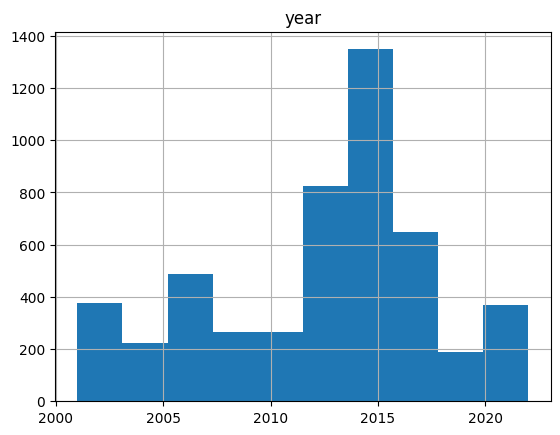

In [76]:
df.hist("year")

In [80]:
df2 = df.groupby(["year", "month"]).sum(numeric_only=True)
df2.head(20)

sales
year month              
2001 5      7.846405e+05
2003 5      1.161422e+06
     6      4.686367e+05
     7      1.339071e+05
2004 6      5.549852e+03
2005 4      1.396158e+05
     6      1.124016e+06
2006 1      1.263622e+06
     2      1.229697e+06
     3      2.503611e+05
2007 1      7.498924e+03
     3      1.893696e+05
     4      5.944204e+04
     9      8.875271e+05
     10     3.809213e+05
2008 1      1.015760e+05
     2      6.726377e+04
2009 1      2.018930e+05
     3      8.672491e+05
     4      3.772853e+03

<AxesSubplot: xlabel='year,month'>

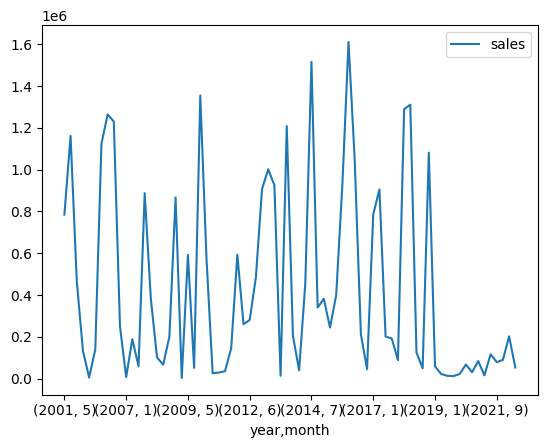

In [81]:
df2.plot()